In [1]:
import matplotlib.pyplot as plt
import numpy as np
colors = plt.cycler(color=
            ['red', 'blue', '#9988DD',
             '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', prop_cycle=colors)

In [2]:
def circle_points(R=10, N=20): 
    theta = np.linspace(0, np.pi * 2, N)
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    return x, y



def connect(*vertex):
    """connect vertex[0]、vertex[1]、vertex[2] ..."""

    x, y = [], []
    for idx, point in enumerate(vertex):
        x.append(point[0])
        y.append(point[1])
        if len(x) == 2:
            plt.plot(x, y)
            x.pop(0)
            y.pop(0)


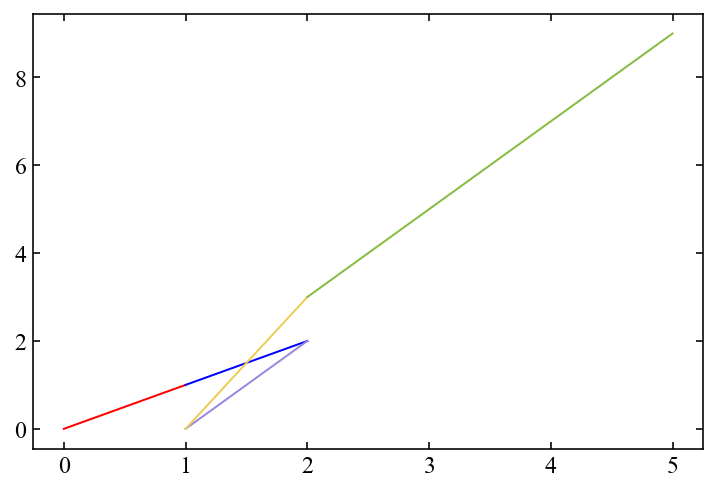

In [3]:
connect([0,0], [1,1], [2,2], [1,0], [2,3], [5,9])

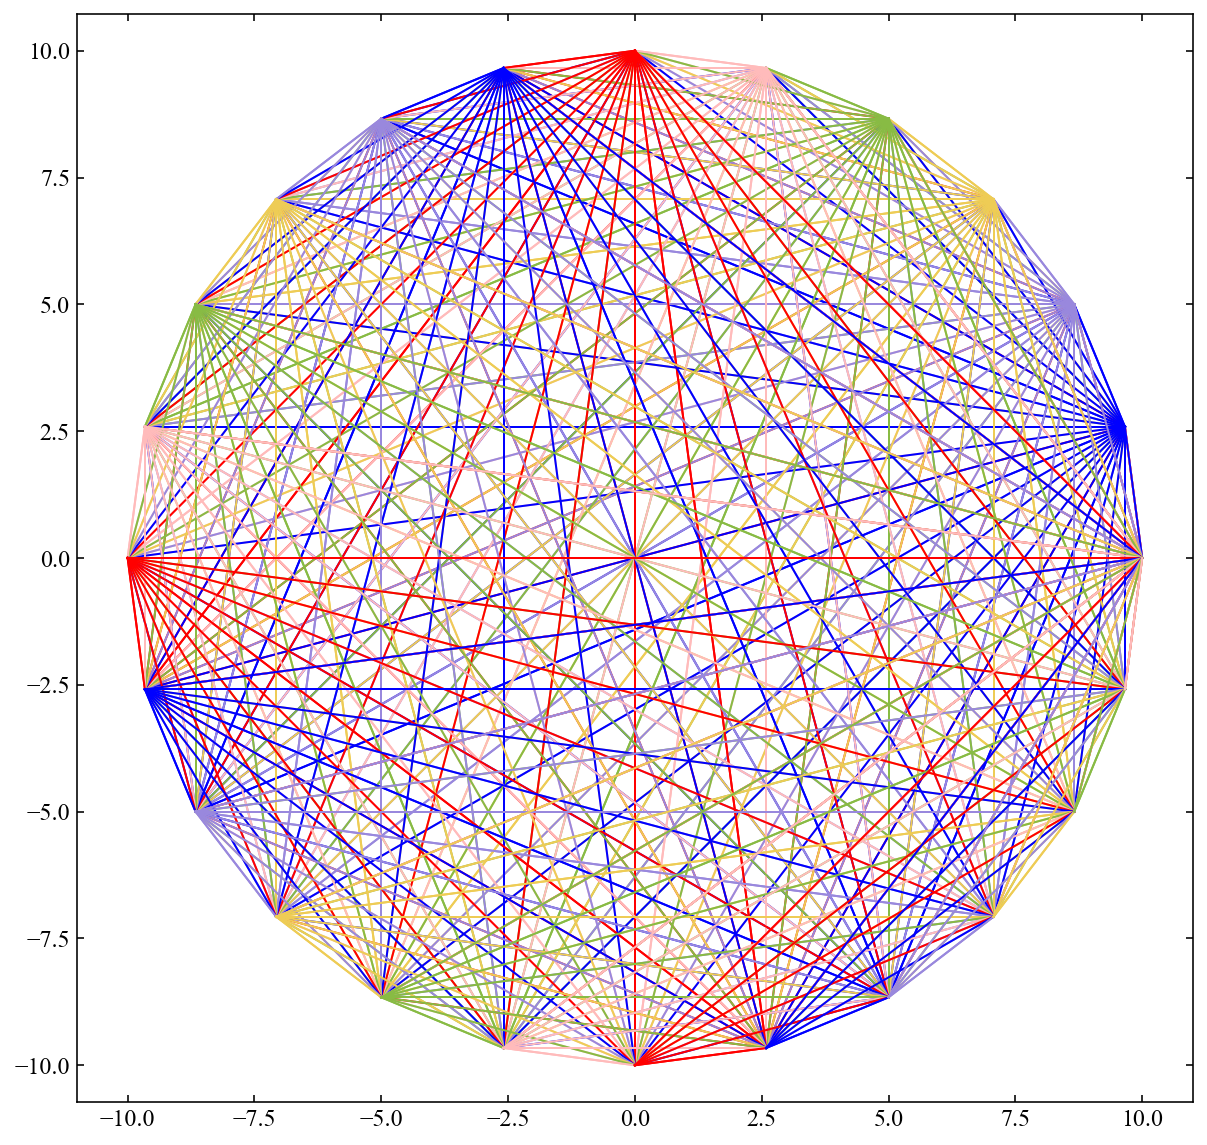

In [5]:
def draw():
    X, Y = circle_points(R=10, N=25)
    plt.figure(figsize=(10,10))
    for idx, (x, y) in enumerate(zip(X,Y)):
        tX, tY = np.delete(X, idx), np.delete(Y, idx)
        for tx, ty in zip(tX, tY):
            connect([x, y], [tx, ty])
    plt.axis("equal")
    plt.show()
draw()

In [79]:
import scipy

In [89]:
def quadrate(edge_length=10, centre=[0, 0]):
    vertex1 = [centre[0] -  edge_length/2, centre[1] +  edge_length/2]
    vertex2 = [centre[0] +  edge_length/2, centre[1] +  edge_length/2]
    vertex3 = [centre[0] +  edge_length/2, centre[1] -  edge_length/2]
    vertex4 = [centre[0] -  edge_length/2, centre[1] -  edge_length/2]
    return vertex1, vertex2, vertex3, vertex4

def line_eq(point1, point2):
    """get line equation (2D)
    return:
        1. the map of x, i.e. f(x)
        2. the coefficient a, b, c of  ax + by = c 
    """
    x1, y1 = point1[0], point1[1]
    x2, y2 = point2[0], point2[1]
    
    if x1 == x2:
#         return (1e16, np.inf), (np.inf, x1, y1, y2)
        x1 += 1e-15
    
    k = (y2 - y1)/(x2 - x1)
    f = lambda x: k*(x - x1) + y1
    b = k*x1 + y1
    
    A = k
    B = -1
    C = k*x1 - y1
    return (k, b), (A, B, C)

def kb2abc(k, b):
    A = k
    B = -1
    C = -b
    return A, B, C

def rot_mat(theta):
    mat = np.array([
        [np.cos(theta),  np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])
    return mat

def k_rot(theta, k):
    A = k
    B = -1
    theta = theta * np.pi/180
    res= rot_mat(theta)@np.array([[A, B]]).T
    a = np.float(res[[0]])
    b = np.float(res[[1]])
    k = -a/b
    return k

def solve_eq(eq1, eq2):

    A = np.array([[eq1[0], eq1[1]], [eq2[0], eq2[1]]])
    b = np.array([eq1[2], eq2[2]]).T
    res = np.linalg.solve(A, b)
    return res

In [81]:
np.inf >= 1e19

True

In [5]:
v1, v2, v3, v4 = quadrate()
(k1, b1), coef1=line_eq(v2, v3)
(k2, b2), coef2=line_eq(v3, v4)

In [7]:
solve_eq(coef1, coef2)

array([ 5., -5.])

In [8]:
k2,b2

(-0.0, -5.0)

(-0.5, 10.5, -17.513412722239202, -4.404123203702895)

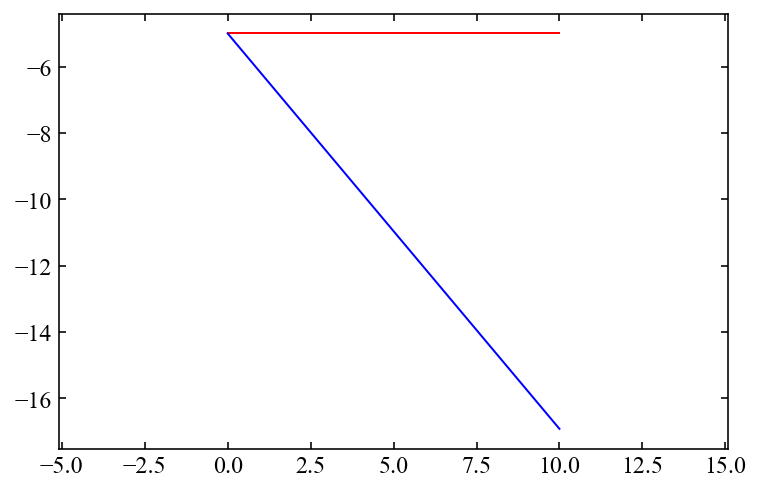

In [9]:
x = np.linspace(0, 10, 100)
plt.plot(x, k2*x+b2)
new_k2 = k_rot(50, k2)
plt.plot(x, new_k2*x+b2)
plt.axis('equal')

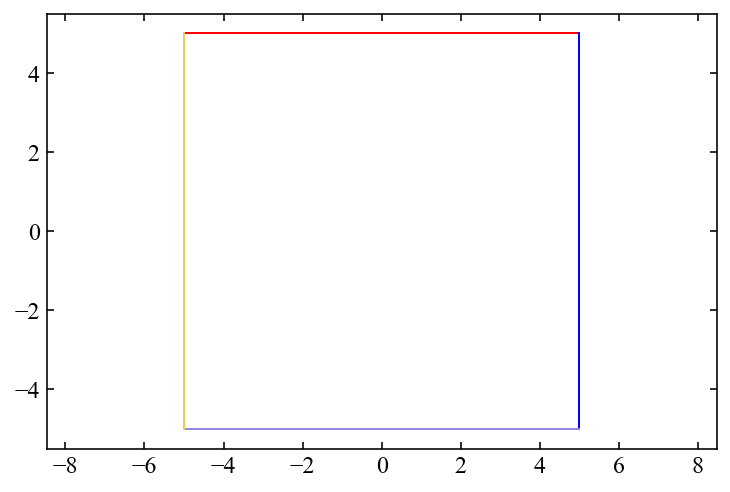

In [10]:
v1, v2, v3, v4 = quadrate()

connect(v1, v2, v3, v4, v1)
plt.axis("equal")
plt.show()

In [107]:
p0

[-5.0, 5.0]

[-5.0, 5.0]
5.0 4.2972958264880425


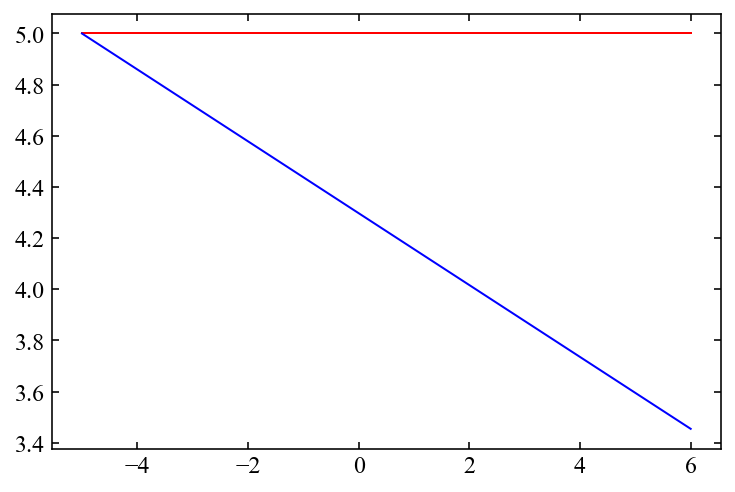

In [118]:
v1, v2, v3, v4 = quadrate()

(k0, b0), (A0,B0,C0) = line_eq(v1, v2)
p0 = v[0]
print(p0)
rot_k0 = k_rot(8, k0)
def slove_b(k, x, y):
    b = y-k * x 
    return b
b = slove_b(rot_k0, *p0)
x = np.linspace(-5, 6, 1000)
print(b0, b)
plt.plot(x, k0*x+b0)
plt.plot(x, rot_k0*x+b)

(-18.089902956506837, 16.64439087678107, -18.45844277592518, 17.29703480306698
)

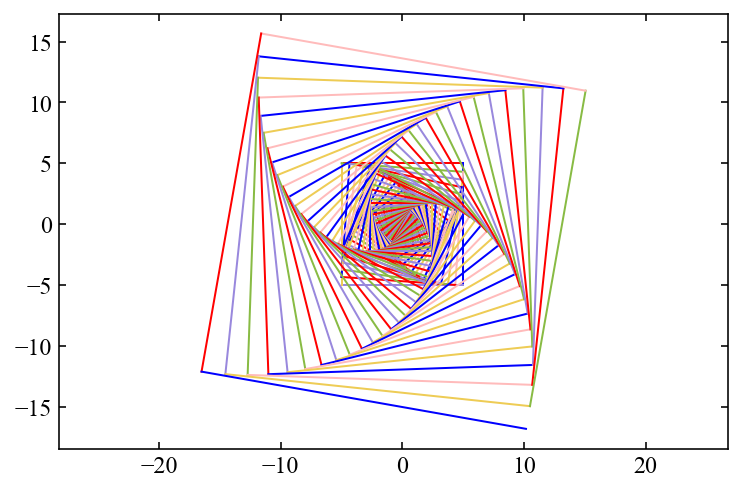

In [146]:
def special_(N, theta):
    plt.figure(figsize=(10, 10))
    v1, v2, v3, v4 = quadrate()
    connect(v1, v2, v3, v4, v1)
    (k0, b0), (A0,B0,C0) = line_eq(v1, v2)
    v = [v1, v2, v3, v4, v1]
    p0 = v[0]
    for idx in range(N):
        p1 = v[idx+1]
        p2 = v[idx+2]
        (k1, b1), coeff = line_eq(p1, p2)

        rot_k0 = k_rot(theta, k0)

        b = slove_b(rot_k0, *p0)

        point = solve_eq(kb2abc(rot_k0, b), coeff)

        connect(p0, point)
        p0 = point
        v.append(point)
        k0, b0 = k1, b1


    plt.axis("equal")

